In [1]:
import gym
import numpy as np
import random 
import sys
import matplotlib.pyplot as plt

terminal_output = open(1, 'w')

env = gym.make("CardFinder-v1")
env.reset()                    
env.render()

[[29 72 70  2  8 41 39 27 46]
 [ 9 45 18 49 71  3 75 44 13]
 [16  6 42 51 48 19 69 61 10]
 [32  0 15 40 66 64 73 31 65]
 [ 5 52 11 25  1 60 24 58 79]
 [36 37 20  4 80 33 77 21 78]
 [38 47  7 35 54 34 76 62 17]
 [12 55 22 57 59 67 23 68 43]
 [28 74 50 53 26 56 14 63 30]]

SNNNNNNN-
N-T-NTN-N
N-NN-NNN-
N--NNNNNN
NTNN-NNN-
--NNNNN-N
N-NNN-NNN
-T--NNNNN
N--NNNN-L


In [2]:
print("Action space: ", env.action_space)
print("Observation space: ", env.observation_space)

Action space:  Discrete(5)
Observation space:  Discrete(81)


In [3]:
state_size = env.observation_space.n  # visas būsenų skaičius
action_size = env.action_space.n      # visas veiksmų skaičius
qtable = np.zeros((state_size, action_size)) # generuojama Q lentelė ir ji užpildoma nuliais

qtable_history = []
score_history = []
# print(qtable)

In [4]:
# parameterai kuriais varijuojama
learning_rate = 0.9 # Apsimokymo dažnis arba learningRate
gamma = 0.9  # Nuolaidos dydis arba gamma
epsilon = 1.0 # Tyrinėjimo tikimybė
max_epsilon = 1.0    # Maksimali tyrinėjimo tikimybės reikšmė
min_epsilon = 0.001   # Minimali tyrinėjimo tikimybės reikšmė
decay_rate= 0.01    # Tyrinėjimo tikimybės mažinimo dydis
total_episodes = 15 # Maksimalus iteracijų kiekis
max_steps = 400 # Maksimalus žingsnių per vieną iteraciją kiekis 

In [5]:
rewards = []
steps_total = []
passNr = 0
passNrLast100 = 0

for episode in range(total_episodes):
    # Aplinka nustatoma iš naujo
    state = env.reset()
    step = 1
    done = False
    total_rewards = 0
    
    print("Epizodas: "+ str(episode), file=terminal_output)
    
    for step in range(max_steps):

        # generuojamas atsitiktinis skaičius
        exp_exp_tradeoff = random.uniform(0, 1)
        
        # jei generuotas kaičius > epsilon tada naudojamasi Q lentele
        if exp_exp_tradeoff > epsilon:
            action = np.argmax(qtable[state,:])

        # jei generuotas kaičius < arba = epsilon tada agentas tyrinėja atsitiktinai
        else:
            action = env.action_space.sample()
               
        # Daromas pasirinktas žingsnis ir stebimi rezultatai
        new_state, reward, done, info = env.step(action)
        if reward == 100:
            passNr += 1
            
        # naudojantis Q funkcija naujimana lentelė
        qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma * np.max(qtable[new_state, :]) - qtable[state, action])
        
        total_rewards += reward
        state = new_state
        
        # Jei tikslas pasiektas epizodas baigiamas
        if done == True: 
            break
        
    # epsilon skaičiaus mažinimas, nes jau turime kažkiek išmoktos informacijos
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode) 
    rewards.append(total_rewards)
    steps_total.append(step)
    
    if reward == 100 and episode>=(total_episodes-100):
        passNrLast100 += 1
        
    if episode % 10000 == 0:
        print('Episode: {} Reward: {} Episode reward: {} Steps Taken: {} Pasiekė tikslą: {}'.format(episode, reward, total_rewards, step, passNr))
    
    episode_count = episode + 1
    if episode_count % 10000 == 0:
        qtable_history.append(qtable)
        score_history.append(sum(rewards)/episode_count)


Episode: 0 Reward: 100 Episode reward: -295 Steps Taken: 48 Pasiekė tikslą: 1


Epsilon pabaigoje: 0.8694888771634071


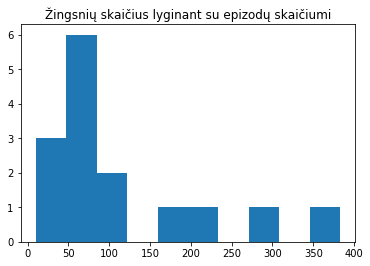

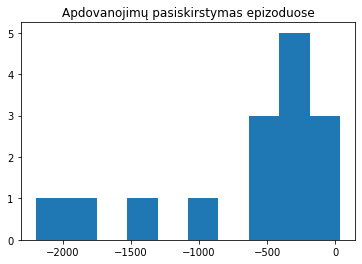

Dalis epizodų kurie pasiekė tikslą: 1.0
Dalis epizodų kurie pasiekė tikslą (iš paskutinio 100 epizodų): 0.15
Vidutinis žingsnių skaičius: 113.73
Vidutinis žingsnių skaičius (iš paskutinio 100 epizodų): 17.06


In [6]:
# plt.plot(list(range(0, total_episodes+1, round((total_episodes+1)/len(score_history))))[1:], score_history)
# plt.title("Apdovanojimų vidurkis lyginant su epizodų skaičiumi")
# plt.show()
print('Epsilon pabaigoje: {}'.format(epsilon))

plt.hist(steps_total, orientation="vertical")
plt.title("Žingsnių skaičius lyginant su epizodų skaičiumi")
plt.show()

plt.hist(rewards, align='mid')
plt.title("Apdovanojimų pasiskirstymas epizoduose")
plt.show()

print("Dalis epizodų kurie pasiekė tikslą: {0}".format(passNr/total_episodes))
print("Dalis epizodų kurie pasiekė tikslą (iš paskutinio 100 epizodų): {0}".format(passNrLast100/100))

print("Vidutinis žingsnių skaičius: %.2f" % (sum(steps_total)/total_episodes))
print("Vidutinis žingsnių skaičius (iš paskutinio 100 epizodų): %.2f" % (sum(steps_total[-100:])/100))

In [7]:
## TESTAI

env.reset()
amountsPassed = 0 # kelintas testas leidžiamas dabar
amountToTest = 100 # kiek testų bus leidžiama išvis
steps_total_test = []
for episode in range(amountToTest):
    state = env.reset()
    step = 1
    done = False
    # print("****************************************************")
    # print("EPISODE ", episode)
    # env.render()
    
    for step in range(max_steps):
        
        # pasirenkamas geriausias (nešantis didžiausią apdovanojimą) galimas veiksmas naudojantis Q lentele
        action = np.argmax(qtable[state,:])
        new_state, reward, done, info = env.step(action)
        # print("Reward", reward)
        # env.render()
        if done:
            if reward == 100: 
                amountsPassed += 1 # sekama kiek iš testų sėkmingai pasiekė tikslą
            # env.render()
            
            # print("steps", step)
            steps_total_test.append(step)
            break
        state = new_state
print("Apmokytas modelis teisingai išsprendė: "+str(amountsPassed) + " iš " + str(amountToTest))
env.close()

Trained model passed: 100 out of 100


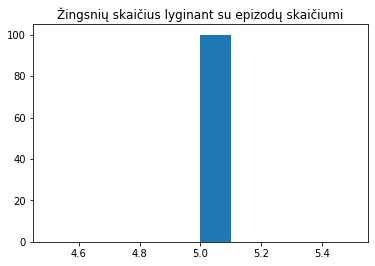

Vidutinis žingsnių skaičius per testą: 5.00


In [8]:
plt.hist(steps_total_test, orientation="vertical")
plt.title("Žingsnių skaičius lyginant su epizodų skaičiumi")
plt.show()

print("Vidutinis žingsnių skaičius per testą: %.2f" % (sum(steps_total_test)/amountToTest))